<a href="https://colab.research.google.com/github/DaniloVeljovic/HandsOnML/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas
df = pandas.read_csv(r'/content/sample_data/mushrooms.csv')
print(df.shape)

df = df.apply(LabelEncoder().fit_transform)

(8124, 23)


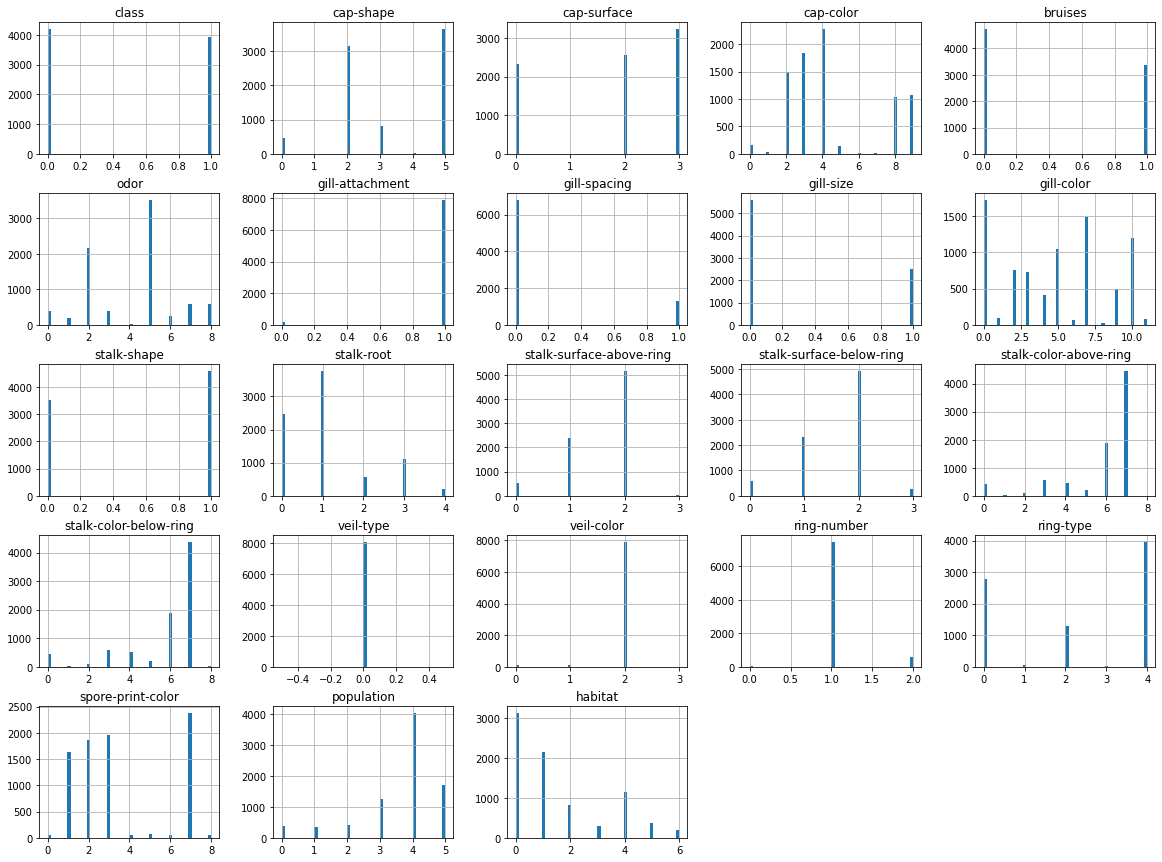

In [3]:
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55261b37d0>,
      dtype=object)

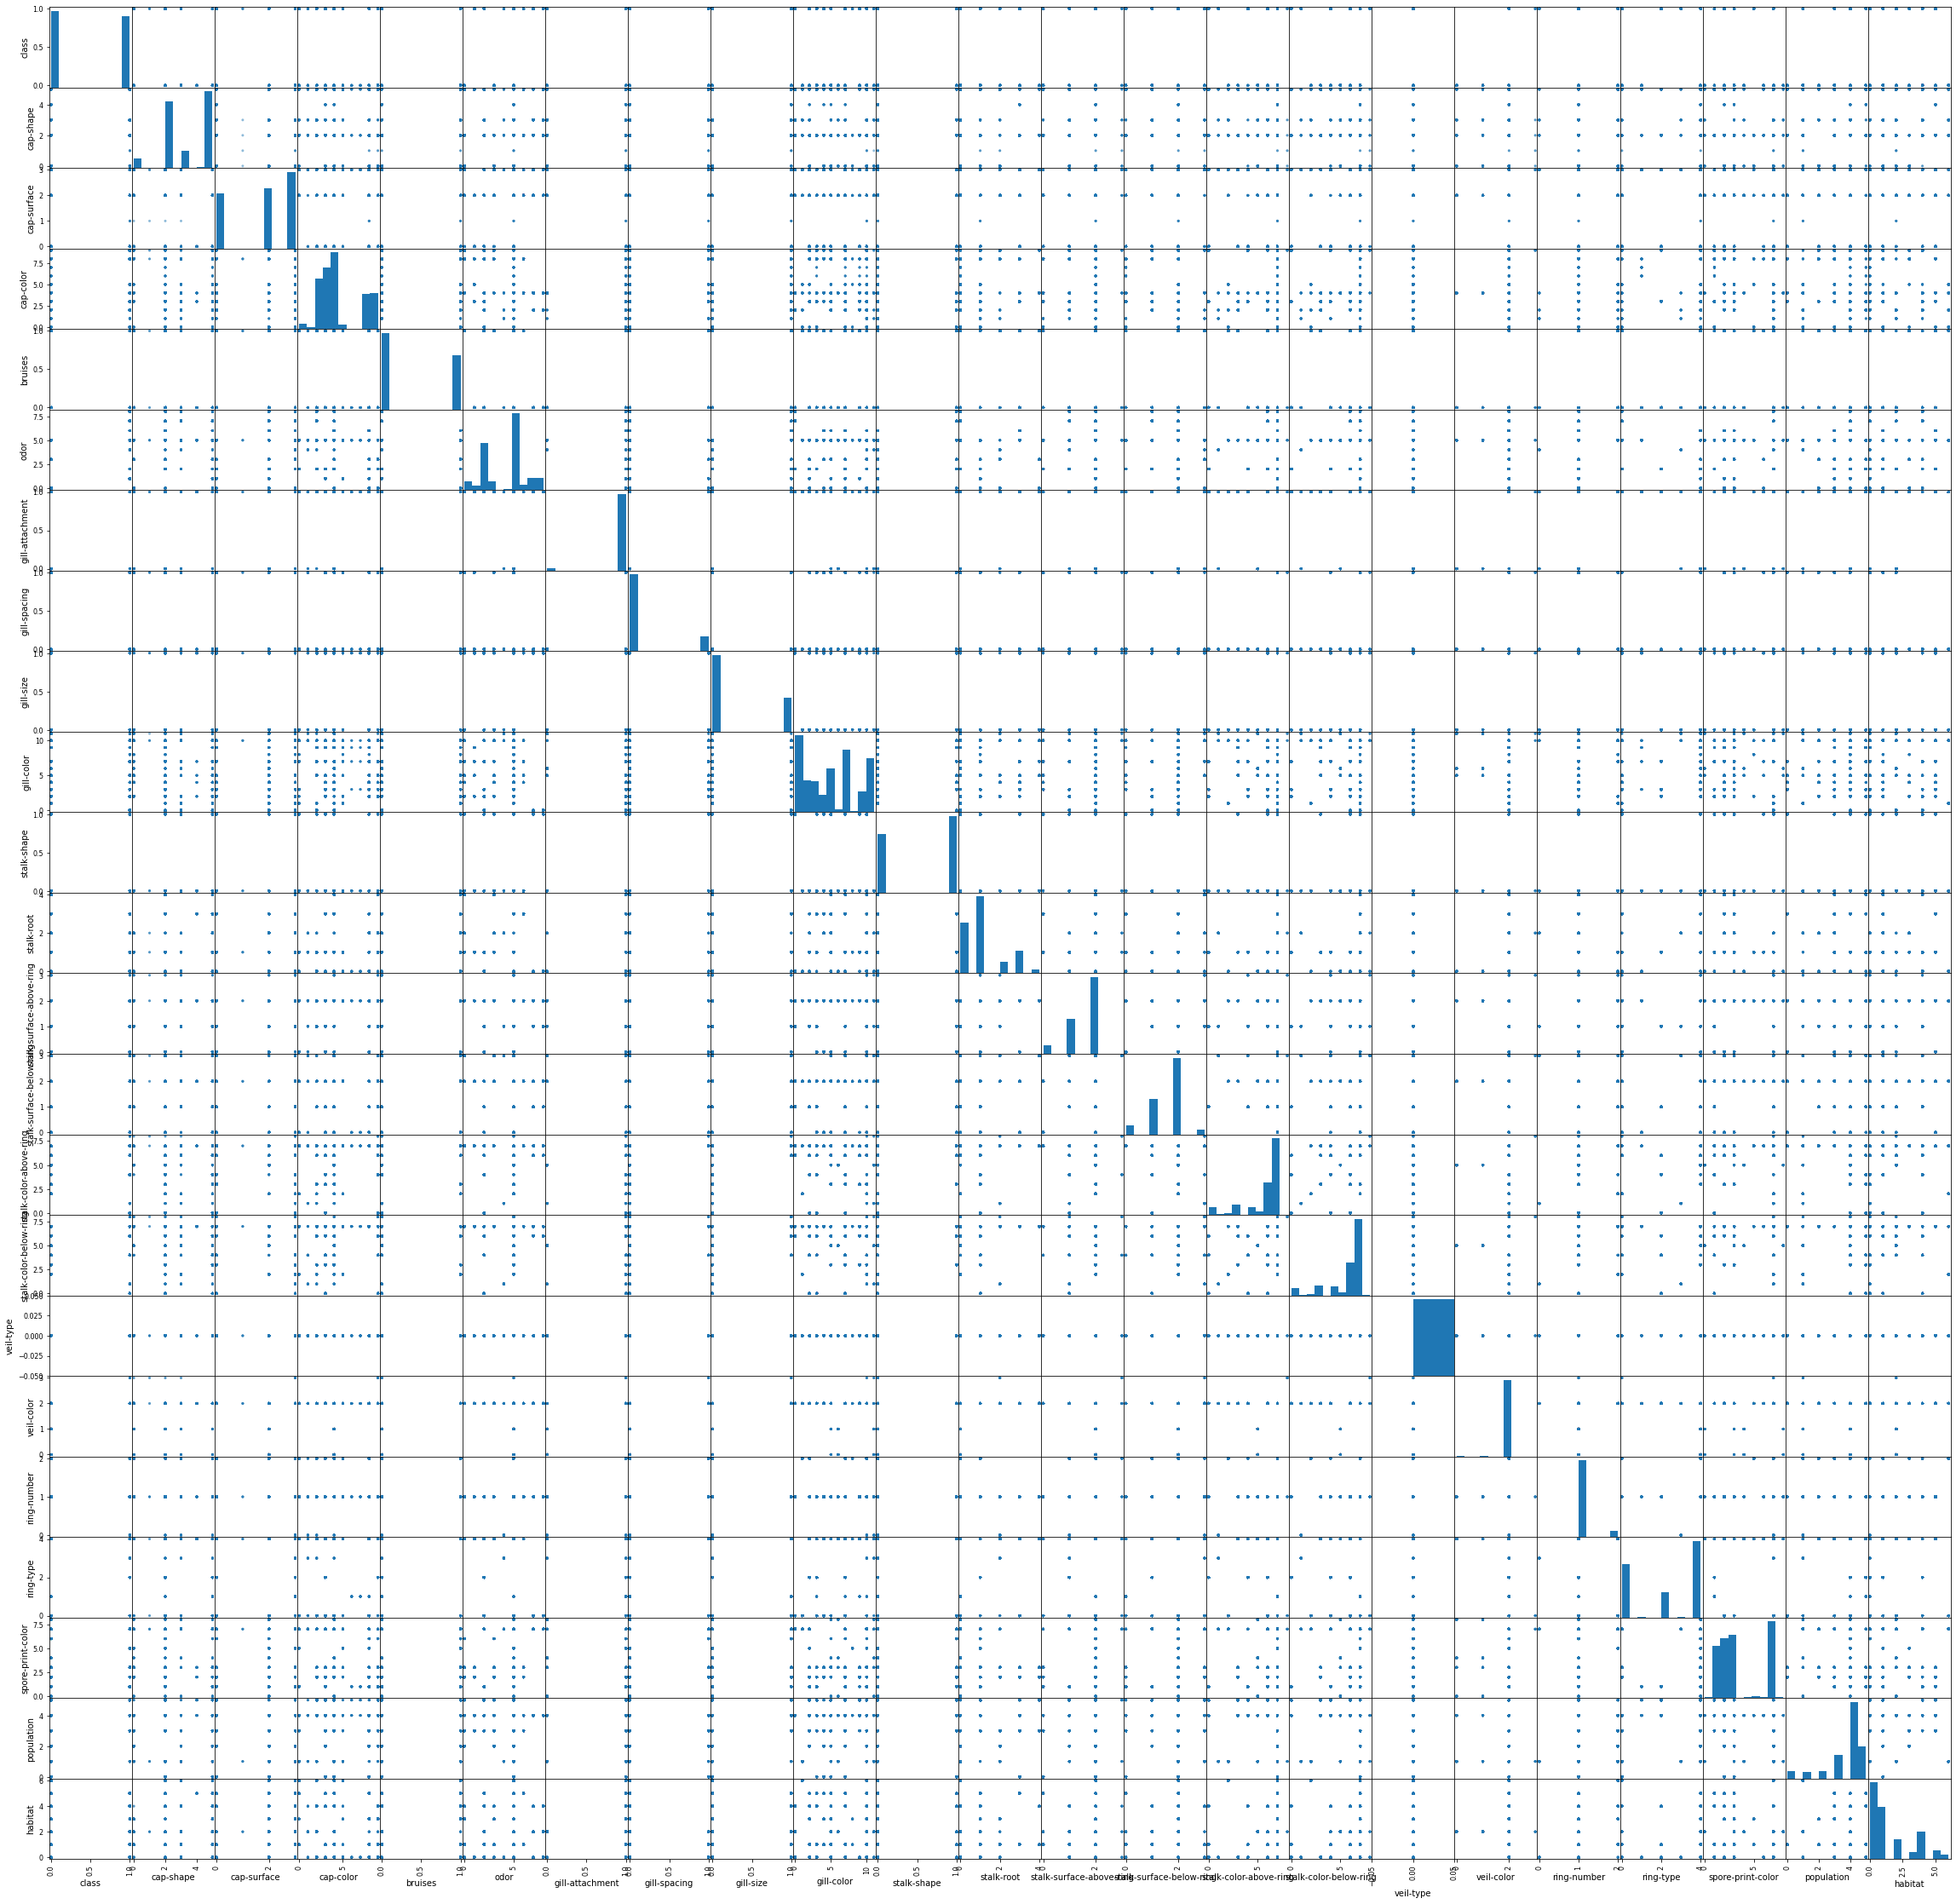

In [4]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(40,40))

In [5]:
df_x = df.drop(['class'], axis=1)
df_y = df['class']

df_x = df_x.to_numpy()
df_y = df_y.to_numpy()

In [6]:
X_train_full, X_test,y_train_full, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
# shape of dataset
print(X_train_full.shape)
print(X_train_full.dtype)

(5443, 22)
int64


In [7]:
# scaling the features
X_valid, X_train = X_train_full[:203], X_train_full[203:]
y_valid, y_train = y_train_full[:203], y_train_full[203:]

In [8]:
# build the neural network
model = keras.models.Sequential()
model.add(keras.layers.Dense(22, activation=keras.activations.relu))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.Accuracy(),
                       keras.metrics.Precision(),
                       keras.metrics.Recall()]
              )

In [9]:
y_train_full_cont = y_train_full * 0.99
y_test_cont = y_test * 0.99
y_valid_cont = y_valid * 0.99
y_train_cont = y_train * 0.99
y_valid_cont = y_valid * 0.99

print(y_train_full_cont.shape)
print(X_test.shape)
print(y_test_cont.shape)
history = model.fit(X_train, y_train_cont, epochs=29, validation_data=(X_valid, y_valid_cont))

(5443,)
(2681, 22)
(2681,)
Epoch 1/29
164/164 [==============================] - 2s 5ms/step - loss: 0.5310 - accuracy: 0.0000e+00 - precision: 0.8126 - recall: 0.6592 - val_loss: 0.4044 - val_accuracy: 0.0000e+00 - val_precision: 0.9265 - val_recall: 0.7079
Epoch 2/29
164/164 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.0000e+00 - precision: 0.9251 - recall: 0.7733 - val_loss: 0.3094 - val_accuracy: 0.0000e+00 - val_precision: 0.9211 - val_recall: 0.7865
Epoch 3/29
164/164 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.0000e+00 - precision: 0.9351 - recall: 0.8174 - val_loss: 0.2620 - val_accuracy: 0.0000e+00 - val_precision: 0.9595 - val_recall: 0.7978
Epoch 4/29
164/164 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.0000e+00 - precision: 0.9348 - recall: 0.8351 - val_loss: 0.2324 - val_accuracy: 0.0000e+00 - val_precision: 0.9605 - val_recall: 0.8202
Epoch 5/29
164/164 [=========================

In [10]:
from sklearn.model_selection import StratifiedKFold, train_test_split

skfolds = StratifiedKFold(n_splits=3)
ret = []
rety = []
for train_index, test_index in skfolds.split(X_train_full, y_train_full):
    # clone_clf = clone(sgd_clf)
    X_train_folds = X_train_full[train_index]
    y_train_folds = y_train_full[train_index] * 0.99
    X_test_fold = X_train_full[test_index]
    y_test_fold = y_train_full[test_index] * 0.99
    model.fit(X_train_folds, y_train_folds)
    y_pred = model.predict(X_test_fold)
    ret.extend(y_pred > 0.5)
    rety.extend(y_test_fold == 0.99)

print(confusion_matrix(ret, rety))

114/114 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.0000e+00 - precision: 0.9977 - recall: 0.9914
[[2826   30]
 [   4 2583]]


In [11]:

precision, recall, fscore, support = score(rety, ret)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


precision: [0.9894958  0.99845381]
recall: [0.99858657 0.98851894]
fscore: [0.9940204  0.99346154]
support: [2830 2613]


In [12]:
# build the neural network
model = keras.models.Sequential()
model.add(keras.layers.Dense(22, activation=keras.activations.relu))
model.add(keras.layers.Dense(1000, activation=keras.activations.relu))
model.add(keras.layers.Dense(500, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.Accuracy(),
                       keras.metrics.Precision(),
                       keras.metrics.Recall()]
              )

In [13]:
print(y_train_full_cont.shape)
print(X_test.shape)
print(y_test_cont.shape)
history = model.fit(X_train, y_train_cont, epochs=29, validation_data=(X_valid, y_valid_cont))

(5443,)
(2681, 22)
(2681,)
Epoch 1/29
164/164 [==============================] - 2s 10ms/step - loss: 0.5668 - accuracy: 0.0000e+00 - precision_1: 0.7851 - recall_1: 0.7009 - val_loss: 0.4451 - val_accuracy: 0.0000e+00 - val_precision_1: 0.9048 - val_recall_1: 0.6404
Epoch 2/29
164/164 [==============================] - 1s 8ms/step - loss: 0.4009 - accuracy: 0.0000e+00 - precision_1: 0.9053 - recall_1: 0.7301 - val_loss: 0.3347 - val_accuracy: 0.0000e+00 - val_precision_1: 0.9315 - val_recall_1: 0.7640
Epoch 3/29
164/164 [==============================] - 1s 8ms/step - loss: 0.3111 - accuracy: 0.0000e+00 - precision_1: 0.9549 - recall_1: 0.8029 - val_loss: 0.2684 - val_accuracy: 0.0000e+00 - val_precision_1: 0.9351 - val_recall_1: 0.8090
Epoch 4/29
164/164 [==============================] - 1s 8ms/step - loss: 0.2572 - accuracy: 0.0000e+00 - precision_1: 0.9538 - recall_1: 0.8462 - val_loss: 0.2203 - val_accuracy: 0.0000e+00 - val_precision_1: 0.9630 - val_recall_1: 0.8764
Epoch 5/29
1

In [14]:
from sklearn.model_selection import StratifiedKFold, train_test_split

skfolds = StratifiedKFold(n_splits=3)
ret = []
rety = []
for train_index, test_index in skfolds.split(X_train_full, y_train_full):
    # clone_clf = clone(sgd_clf)
    X_train_folds = X_train_full[train_index]
    y_train_folds = y_train_full[train_index] * 0.99
    X_test_fold = X_train_full[test_index]
    y_test_fold = y_train_full[test_index] * 0.99
    model.fit(X_train_folds, y_train_folds)
    y_pred = model.predict(X_test_fold)
    ret.extend(y_pred > 0.5)
    rety.extend(y_test_fold == 0.99)

print(confusion_matrix(ret, rety))

114/114 [==============================] - 1s 7ms/step - loss: 0.0433 - accuracy: 0.0000e+00 - precision_1: 0.9983 - recall_1: 0.9954
[[2830   10]
 [   0 2603]]


In [15]:
precision, recall, fscore, support = score(rety, ret)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


precision: [0.99647887 1.        ]
recall: [1.         0.99617298]
fscore: [0.99823633 0.99808282]
support: [2830 2613]


In [16]:
y_predict = model.predict(X_test) > 0.5

precision, recall, fscore, support = score(y_test, y_predict)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


precision: [0.99854545 0.99617152]
recall: [0.99637155 0.99846508]
fscore: [0.99745732 0.99731698]


2681


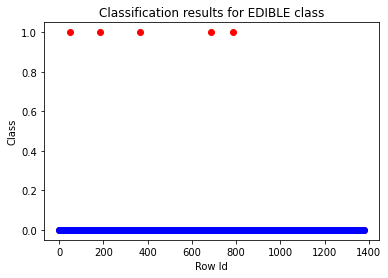

<Figure size 1080x288 with 0 Axes>

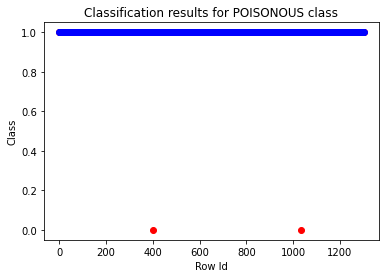

<Figure size 1080x288 with 0 Axes>

In [17]:
y_predict = model.predict(X_test) > 0.5
testSetNum = y_test.shape[0]
print(testSetNum)

import matplotlib.pyplot as plt
rowIdsE = []
rowIdsP = []
y_e_actual = []
y_e_predicted = []
y_p_actual = []
y_p_predicted = []
eIndex = 0
pIndex = 0

for i in range(testSetNum):
  if y_test[i] == 0:
    if y_predict[i] == False:
       y_e_actual.append(0)
       y_e_predicted.append(0)
       rowIdsE.append(eIndex)
    else:
      y_e_actual.append(0)
      y_e_predicted.append(1)
      rowIdsE.append(eIndex)
    eIndex = eIndex + 1
  else:
    if y_predict[i] == False:
       y_p_actual.append(1)
       y_p_predicted.append(0)
       rowIdsP.append(pIndex)
    else:
      y_p_actual.append(1)
      y_p_predicted.append(1)
      rowIdsP.append(pIndex)
    pIndex = pIndex + 1

plt.scatter(rowIdsE, y_e_predicted, color = "red")
plt.scatter(rowIdsE, y_e_actual, color = "blue")
plt.title("Classification results for EDIBLE class")
plt.xlabel("Row Id")
plt.ylabel("Class")
plt.figure(figsize=(15,4))
plt.show()

plt.scatter(rowIdsP, y_p_predicted, color = "red")
plt.scatter(rowIdsP, y_p_actual, color = "blue")
plt.title("Classification results for POISONOUS class")
plt.xlabel("Row Id")
plt.ylabel("Class")
plt.figure(figsize=(15,4))
plt.show()



In [18]:
import collections, numpy
unique, counts = numpy.unique(y_predict, return_counts=True)
dict(zip(unique, counts))



{False: 1375, True: 1306}

In [19]:

unique, counts = numpy.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1378, 1: 1303}

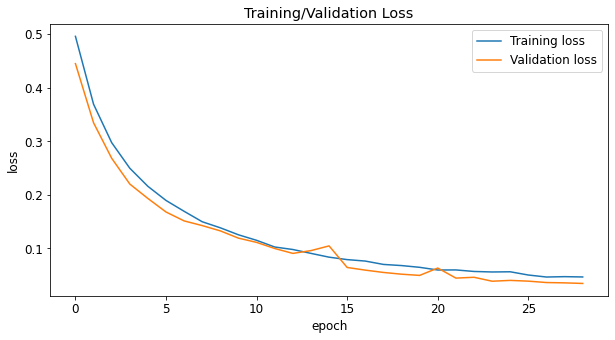

Accuracy: 0.9973890339425587
Roc area under curve: 0.9974183167792979


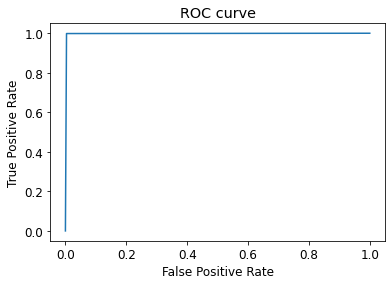

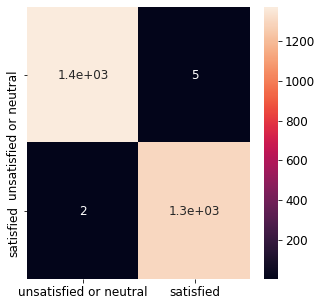

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import seaborn as sb



pred = model.predict(X_test)
pred = np.around(pred)

def plot_model_performance(results, pred, y_test):
    
    plt.figure(figsize=(10,5))
    plt.title('Training/Validation Loss')
    plt.plot(results.history['loss'], label = 'Training loss')
    plt.plot(results.history['val_loss'], label = 'Validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    print('Accuracy:',accuracy_score(y_test,pred))
    print('Roc area under curve:',roc_auc_score(y_test,pred))
    fpr,tpr,_ = roc_curve(y_test,pred)

    plt.title('ROC curve')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    classes = ['unsatisfied or neutral','satisfied']
    cm = confusion_matrix(y_test,pred)
    df = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize=(5,5))
    sb.heatmap(df,annot=True)
    plt.rc('font', size=12) 
    plt.plot()
    
plot_model_performance(history,pred,y_test)

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(rety, ret)

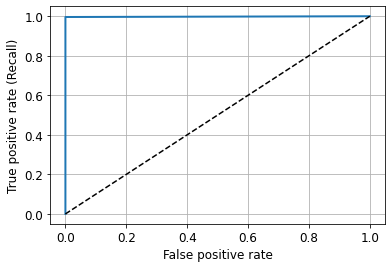

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis("on")
    plt.grid()
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (Recall)")
    
plot_roc_curve(fpr, tpr)
plt.show()